<a href="https://colab.research.google.com/github/SofiaPetrissans/test/blob/main/PEC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enunciado

## Apartado 1
**Cargar los datos (wine1.data).**

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np

# Nombrar las columnas según las variables del enunciado
dataset_keys = [
    'Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
    'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
    'Color_intensity', 'Hue', 'OD280/OD315', 'Proline'
]

# Cargar los datos
dataset = pd.read_csv('wine1.data', header=None, names=dataset_keys)

# Mostrar el dataset cargado
display(dataset)


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,C,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,C,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,C,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,C,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Apartado 2
**Realizar un estudio exploratorio de los datos con gráficos y tablas. Puede ser tanto univariante como multivariante.**

Realizo una primera exploración de los datos observando las estadísticas descriptivas básicas para cada columna

In [ ]:
# Estadísticas descriptivas básicas
print(dataset.describe())

          Alcohol  Malic_acid         Ash  Alcalinity_of_ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

Seguido, visualizo la distribución de las clases. Sabemos que la primera columna corresponde a la clase de vino donde cada una corresponde con una de las 3 variedades de uva.

In [ ]:
# Distribución de clases
print(dataset['Class'].value_counts())

Class
B    71
A    59
C    48
Name: count, dtype: int64


Vemos que hay 59 muestras de vinos elaborados con la variedad de uva A, 71 de la clase B y 48 de la C.

También compruebo si existen valores nulos para alguna de las muestras:

In [ ]:
# Verificar valores nulos
print(dataset.isnull().sum())

Class                   0
Alcohol                 0
Malic_acid              0
Ash                     0
Alcalinity_of_ash       0
Magnesium               0
Total_phenols           0
Flavanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64


Por lo que se puede observar, no hay ningún valor nulo.

Para visualizar los atributos (columnas) de una manera más visual, utilizaré un histograma para cada uno de ellos, lo que permite observar la distribución de los datos. También realizaré un boxplot para ver de manera visual las estadísitcas basícas obtenidas en el código anterior.

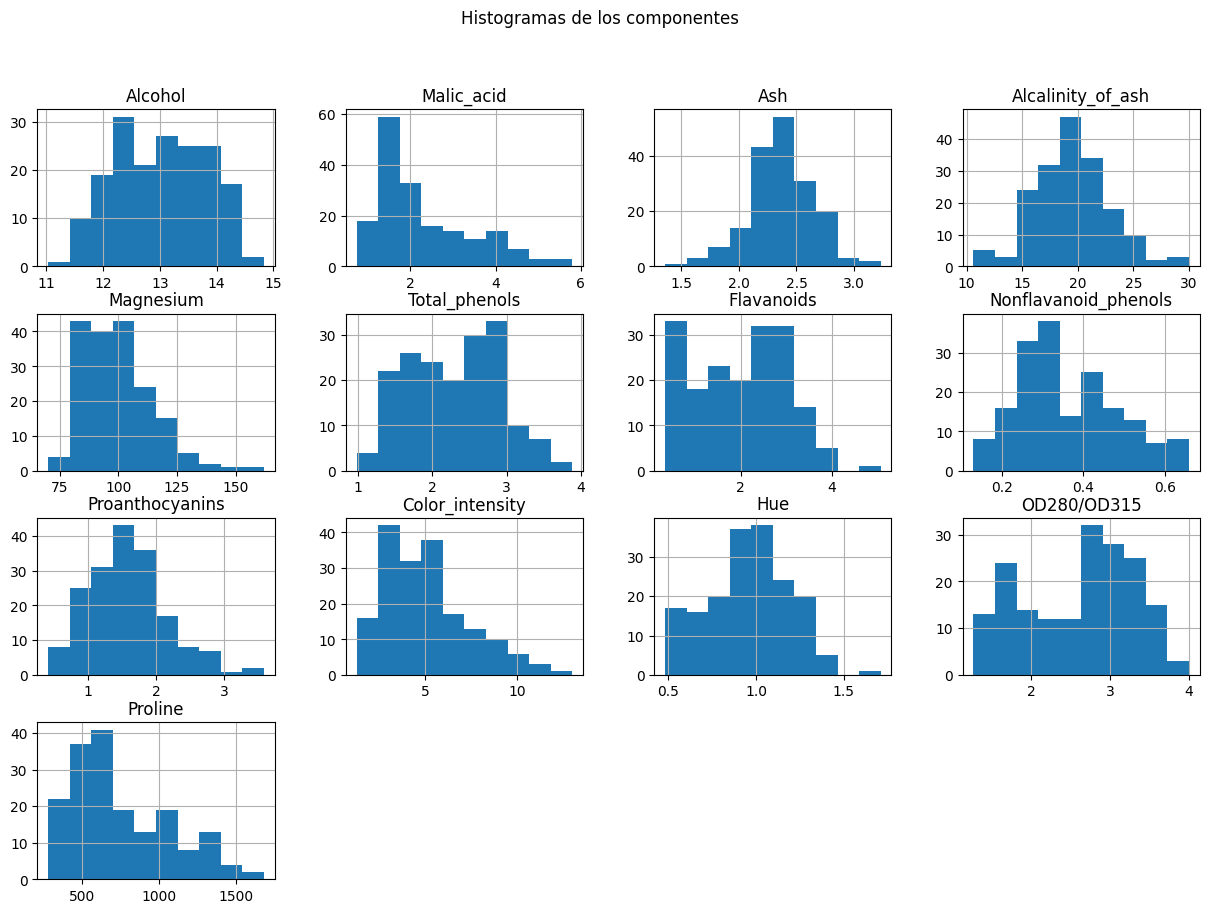

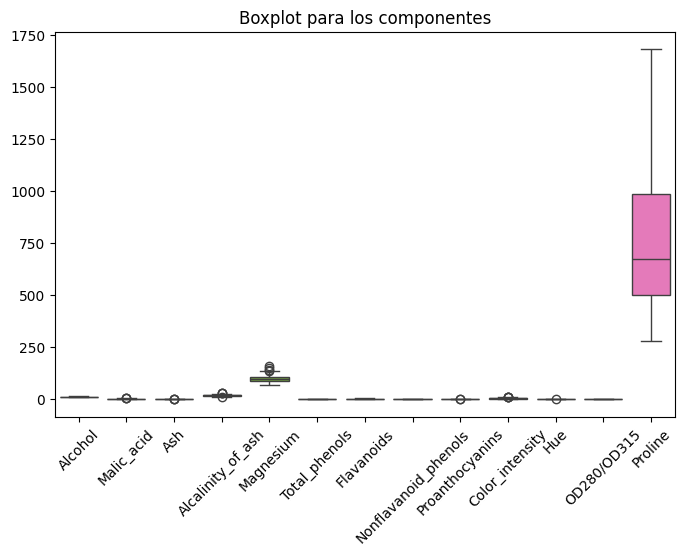

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma
dataset.hist(figsize=(8, 5), layout=(4, 4))
plt.suptitle("Histogramas de los componentes")
plt.show()

# Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataset.drop('Class', axis=1))
plt.title("Boxplot para los componentes")
plt.xticks(rotation=45)
plt.show()


Como análisis de multivariante, calcularé la matriz de correlaciones y la visualizaré a través de un heatmap. Esta representación permite identificar que componentes están fuertemente o debilmente correlacionados entre si.

Nota: hay que tener en cuenta que hay que la primera columna (Class) al ser categórica, hay que excluirla

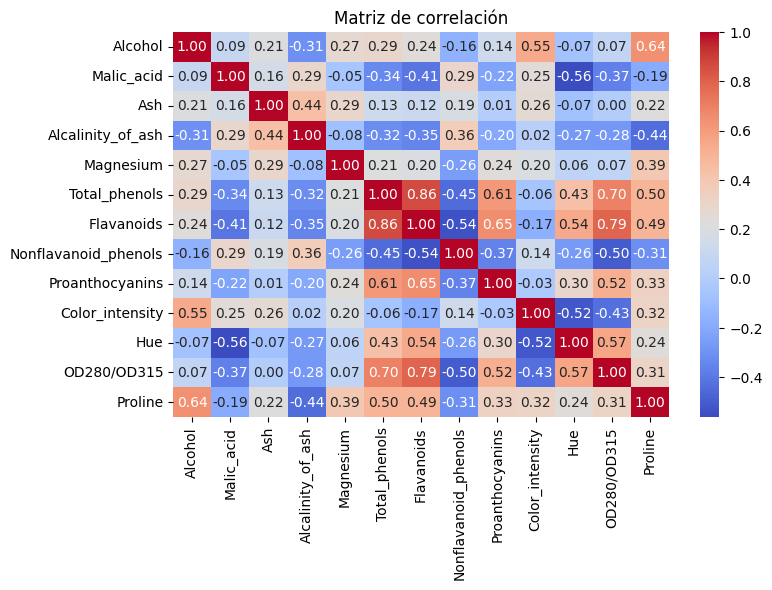

In [3]:
# Matriz de correlación y heatmap
plt.figure(figsize=(8, 5))
correlation_matrix = dataset.drop('Class', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


## Apartado 3
**En caso necesario, normalizar las expresiones con la transformación minmax Justificar respuesta**.

Tanto en las estadísticas básicas como en los gráficos, sobre todo en el boxplot, se muestra que la característica `Proline` presenta magnitudes mucho mayores al resto de caracterísitcas. Esto hace que el gráfico no se pueda interpretar facilmente ya que domina sobre el resto de características con magnitudes menores.

Además, en los casos de redes neuronales la normalización ayuda a optimizar los procesos. Como se menciona en el apartado 2.3 del libro Deep Learning (*LeCun, Y., Bengio, Y., & Hinton, G. (2015). Deep learning. Nature (London), 521(7553), 436–444*), "Se recomienda que los atributos estén en el rango [0, 1],
aunque no es imprescindible. En cualquier caso, sí se recomienda que los datos estén en una escala similar,
es decir, que no haya atributos en un rango de varias magnitudes superior a otros atributos". Como ocurre en este caso debido a la `Proline`, aplicaré la normalización.

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Crear una copia de los datos para preservar el conjunto original
# dataset_normalized = dataset.copy()

# Aplicar la normalización Min-Max a las columnas numéricas
scaler = MinMaxScaler()
columns_to_normalize = dataset.columns[1:]
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

# Mostrar las estadísticas de las columnas normalizadas
print(dataset.describe())


          Alcohol  Malic_acid         Ash  Alcalinity_of_ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean     0.518584    0.315484    0.538244           0.458502    0.323278   
std      0.213639    0.220780    0.146708           0.172142    0.155244   
min      0.000000    0.000000    0.000000           0.000000    0.000000   
25%      0.350658    0.170455    0.454545           0.340206    0.195652   
50%      0.531579    0.222332    0.534759           0.458763    0.304348   
75%      0.696711    0.462945    0.640374           0.561856    0.402174   
max      1.000000    1.000000    1.000000           1.000000    1.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        0.453487    0.356386              0.437460         0.372523   
std         0.215811    0.210730              0.234818         0.180555   
min         0.0

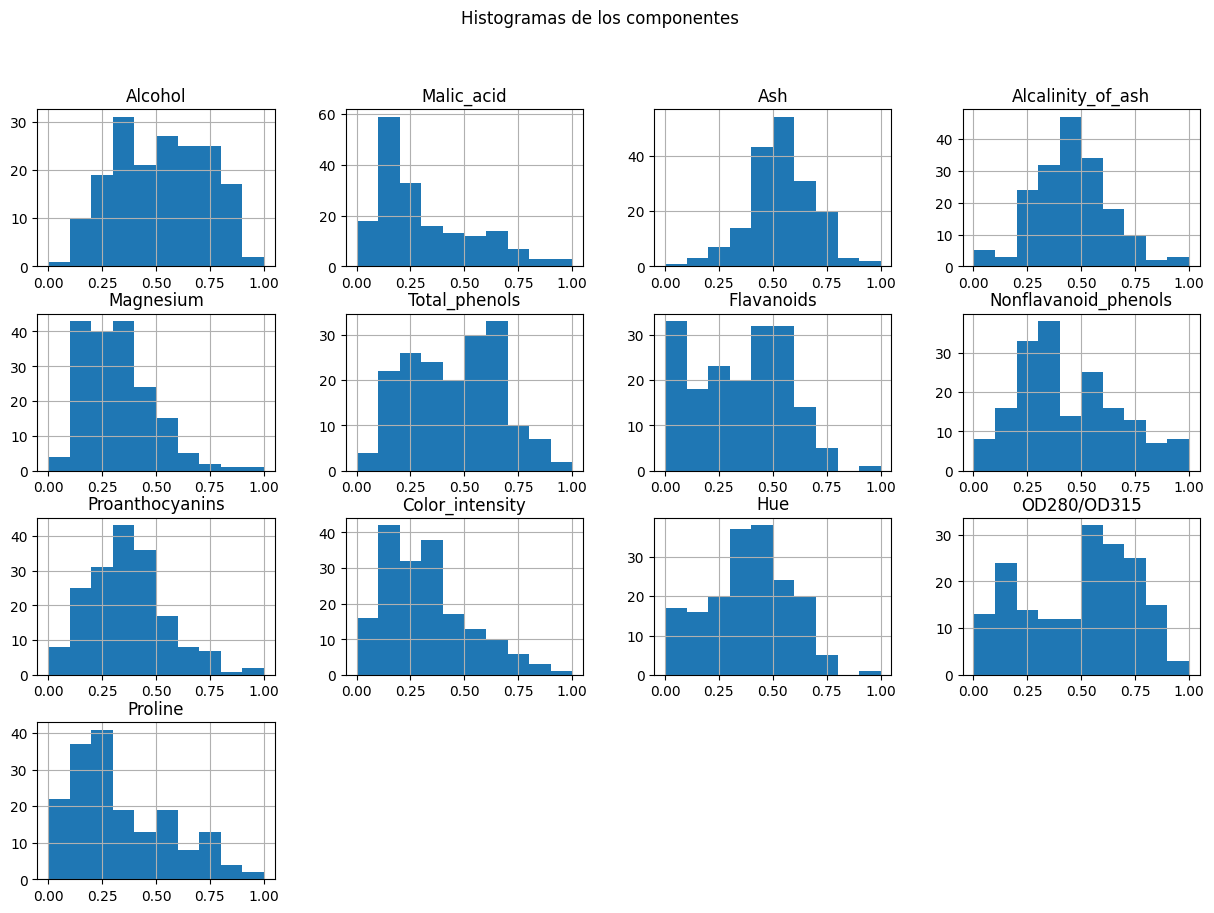

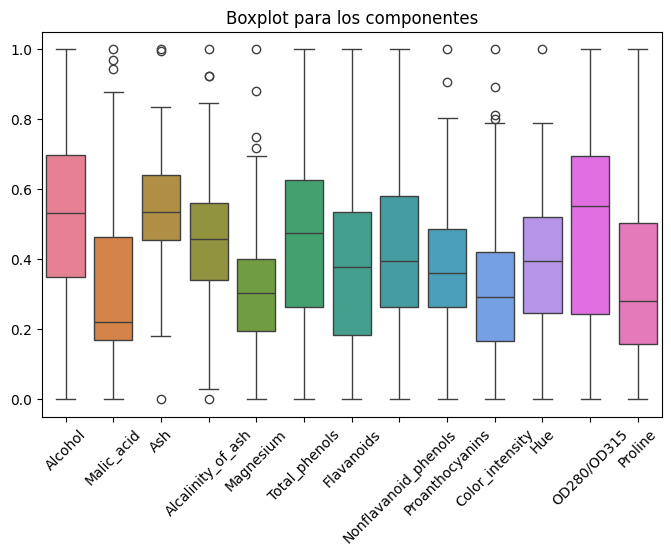

In [ ]:
# Histograma
dataset.hist(figsize=(8, 5), layout=(4, 4))
plt.suptitle("Histogramas de los componentes")
plt.show()

# Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataset.drop('Class', axis=1))
plt.title("Boxplot para los componentes")
plt.xticks(rotation=45)
plt.show()


Como se puede observar, claramente, la normalización de los datos beneficia a la interpretación de los datos.

## Apartado 4
**Separar los datos en train (2/3) y test (1/3).**

Como se explica en los recursos de la lección se utiliza la función `train_test_split` para poder dividir los datos. Hay que seleccionar las variables independientes y dependientes.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import tensorflow as tf
import random

# Fijar semillas
seed = 123
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

Primero descargo las librerias necesarias para los apartados que siguen y fijo la semilla de aleatoridad para obtener siempre los mismos resultados.

In [5]:
# Separar características (X) y etiquetas (y)
X = dataset.drop('Class', axis=1)  # Eliminar la columna 'Class'
y = dataset['Class']  # Etiquetas (class)

# Cambiar las etiquetas de las clases por números A=0; B=1, C=2
label_encoder = LabelEncoder()
# Aplicar el codificador a y_train
y = label_encoder.fit_transform(y)

# Dividir los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=seed, stratify=y)

# Mostrar el tamaño de cada conjunto
print("Número de muestras de train:" + str(len(X_train)))
print("Número de muestras de test:" + str(len(X_test)))


Número de muestras de train:118
Número de muestras de test:60


## Apartado 5
**Definir el modelo 1, que consiste en una red neuronal con una capa oculta densa de 8 nodos, con activación relu. Añadir un 30% de dropout. Proporcionar el summary del modelo y justificar el total de parámetros de cada capa.**

Por lo tanto, se cargan las librerias necesarias y se crea el modelo con una capa oculta de 8 nodos y activación relu como indica el enunciado. Además se añade un 30% de dropout para prevenir el sobreentrenamiento u *overfitting* (*LeCun, Y., Bengio, Y., & Hinton, G. (2015). Deep learning. Nature (London), 521(7553), 436–444, apartado 7.2.4*)

In [6]:
# Crear el modelo secuencial
model_1 = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)), # Capa oculta densa con 8 nodos y activación ReLU
    Dropout(0.3), # Dropout del 30%
    Dense(3, activation='sigmoid')  # Capa de salida con 3 nodos (para las 3 clases)
])

# Compilar el modelo
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Mostrar el resumen del modelo
model_1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)


Los parámetros son:


*  Capa oculta:
   -  Tiene 8 nodos
   -  Cada nodo recibe 13 entradas (características del vino)
   -  Parámetros = (nº entradas x nº nodos) + nº nodos
   -  (13 x 8) + 8 = 112
*  Dropout:
   -  No suma nada a los parámetros
*  Capa de salida:
   -  Hay 3 salidas/nodos, uno por cada clase de vino
   -  Cada nodo recibe la salida de los 8 nodos de la capa oculta
   -  Parámetros = (nº nodos capa anterior x nº nodos salida) + nº nodos
   -  (8 x 3) + 3 = 27
*  Total de parámetros = 112 + 0 + 27 = 139



## Apartado 6

**Ajustar el modelo 1 con un 20% de validación, mostrando la curva de aprendizaje de entrenamiento y
validación con 100 épocas.**

Como se explica en el video "Python_lenguaje_programacion" que pertenece a los recursos del temario, se puede utilizar la función `fit()` para entrenar el modelo. Como se explica en la web de Keras (https://keras.io/api/models/model_training_apis/) el método `fit` tiene varios argumentos. En ellos podemos especificar el porcentaje de validación y las épocas entre otras muchas opciones.


In [7]:
# Ajustar el modelo con 20% de validacion y 100 epocas
model1_fitted = model_1.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.2935 - loss: 1.2367 - val_accuracy: 0.2917 - val_loss: 1.1440
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3208 - loss: 1.2196 - val_accuracy: 0.3333 - val_loss: 1.1383
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3471 - loss: 1.1671 - val_accuracy: 0.3333 - val_loss: 1.1328
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2775 - loss: 1.2139 - val_accuracy: 0.3333 - val_loss: 1.1274
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2488 - loss: 1.2489 - val_accuracy: 0.2917 - val_loss: 1.1225
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3904 - loss: 1.1567 - val_accuracy: 0.2500 - val_loss: 1.1183
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3102 - loss: 1.2204 - val_accuracy: 0.2500 - val_loss: 1.1139
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3442 - loss: 1.1392 - val_accuracy: 0.2500 - val_loss:

Como se explica en la web de Keras este modelo devuelve: "A History object. Its History.history attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable)." Por lo tanto, como se indica se extraera del objeto `history` los valores necesarios para mostrar la curva de aprendizaje y validación.

Recursos utilizados en este apartado:

*  Python Keras - Learning Curve for Classification Model - Analytics Yogi(https://vitalflux.com/python-keras-learning-validation-curve-classification-model/)
*  Model training APIs (https://keras.io/api/models/model_training_apis/)

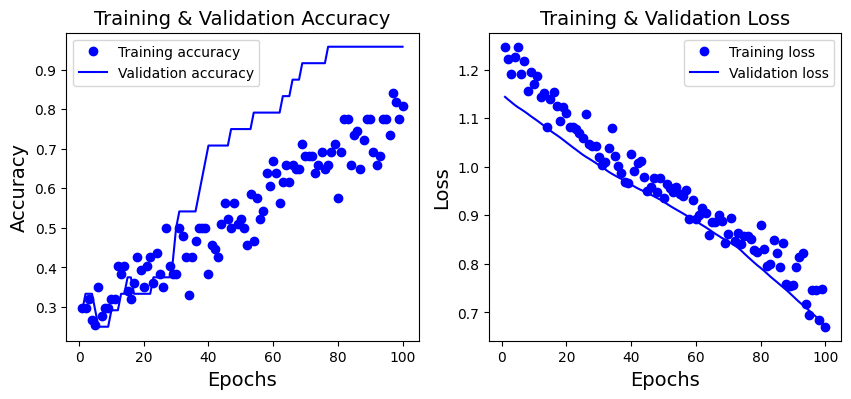

In [8]:
history_dict = model1_fitted.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot the model accuracy vs Epochs
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=14)
ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Accuracy', fontsize=14)
ax[0].legend()

# Plot the loss vs Epochs
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=14)
ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Loss', fontsize=14)
ax[1].legend()

EXPLICAR GRÁFICOS

## Apartado 7
**Obtener la tabla de clasificación errónea en test. Y las métricas usuales de evaluación.**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


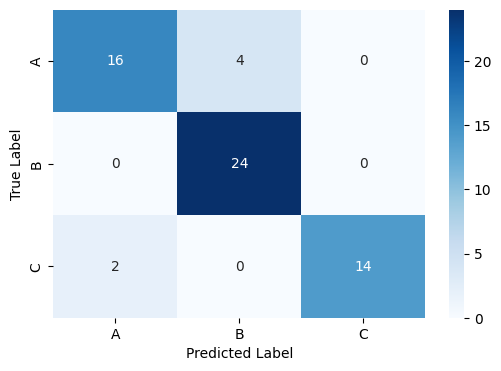

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar el modelo en el conjunto de prueba
y_pred_probs = model_1.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Tabla de clasificación errónea
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [10]:
# Calcular métricas de evaluación
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(class_report)

              precision    recall  f1-score   support

           A       0.89      0.80      0.84        20
           B       0.86      1.00      0.92        24
           C       1.00      0.88      0.93        16

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.91      0.90      0.90        60



Con los resultados obtendidos en este apartado se observa que:

*  En la matriz de confusión se observa que:
  - La clase A, se predijo correctamente 16 de 18 veces. Se predijo 2 veces como A cuando era C.
  - La clase B se predijo correctamente 24 veces de 28. Se predijo 4 veces como B cuando en realidad era A.
  - La clase C se predijo correctamente 14 veces de 14.

*  De las metricas derivadas de la matriz se observa que:
  - Para la clase A. La `precision` es del 89% (16/18). El `recall` para A es del 80%, es decir que el 80% de las muestras verdaderas de clase A fueron identificadas correctamente (16/20), es decir, tiene una tasa baja de falsos negativos. El `F1-score`, que se refiere al balance entre `precision` y `recall` es de 0.84. Mientras que `support` indica el número de A que había en el conjunto de prueba.
  - Para la clase B. La `precision` es del 86%, es decir tiene una tasa de falsos positivos para esta clase. El `recall` indica que tiene una tasa de falsos negativos nula, el modelo identificó correctamente el 100% de las muestras reales de la clase B (24/24). El `F1-score` es de 0.92 por lo que hay balance muy bueno entre las dos métricas anteriores.
  - Para la clase C. La `precision` es del 100%. Con un `recall` del 88% también, por lo que tiene una tasa buena tanto de falsos positivos como de falsos negativos. Esto hace que el `F1-score` sea de 0.93.

*  El `accuracy` o exactitud es de 0.90, es decir, que el modelo predice correctamente un 90%.

*  Calcula tambien el promedio de las metricas observadas anteriormente para cada clase, sin ajustar por el número de ejemplos por cada clase que hay en el conjunto de prueba (`macro avg`) y teniendo en cuenta el número por cada clase (`weighted avg`).

## Apartado 8

**Definir el modelo 2, que consiste en una red neuronal con dos capas ocultas densas de 10 nodos y 5 nodos, con activación relu. Añadir un 30% de dropout en ambas capas. Proporcionar el summary del modelo y justificar el total de parámetros de cada capa.**

In [10]:
# Crear el modelo secuencial
model_2 = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)), # Capa oculta densa con 10 nodos y activación ReLU
    Dropout(0.3), # Dropout del 30%
    Dense(5, activation='relu'), # Capa oculta densa con 5 nodos y activación ReLU
    Dropout(0.3), # Dropout del 30
    Dense(3, activation='sigmoid')  # Capa de salida con 3 nodos (para las 3 clases)
])

# Compilar el modelo
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Mostrar el resumen del modelo
model_2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 10)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213 (852.00 B)

 Trainable params: 213 (852.00 B)

 Non-trainable params: 0 (0.00 B)

Los parámetros son:

*  Primer capa oculta:
   -  Tiene 10 nodos
   -  Cada nodo recibe 13 entradas (características del vino)
   -  Parámetros = (nº entradas + 1) x nº nodos
   -  (13 + 1) x 10 = 140
*  Dropout:
   -  No suma nada a los parámetros
*  Segunda capa oculta:
   -  Tiene 5 nodos
   -  Cada nodo recibe 10 entradas (de la capa anterior)
   -   Parámetros = (nº entradas + 1) x nº nodos
   -  (10 + 1) x 5 = 55
*  Dropout:
   -  No suma nada a los parámetros
*  Capa de salida:
   -  Hay 3 salidas/nodos, uno por cada clase de vino
   -  Cada nodo recibe la salida de los 5 nodos de la segundacapa oculta
   -  Parámetros = (nº entradas + 1) x nº nodos
   -  (5 + 1) x 3 = 18
*  Total de parámetros = 140 + 0 + 55 + 0 + 18 = 213

## Apartado 9

**Ajustar el modelo 2 con un 20% de validación, mostrando la curva de aprendizaje de entrenamiento y validación con 100 épocas**

Vuelvo a realizar los mismos pasaso que para el modelo 1

In [11]:
# Ajustar el modelo con 20% de validacion y 100 epocas
model2_fitted = model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.3247 - loss: 1.2865 - val_accuracy: 0.1667 - val_loss: 1.3016
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2342 - loss: 1.2901 - val_accuracy: 0.1667 - val_loss: 1.2743
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2793 - loss: 1.2782 - val_accuracy: 0.1667 - val_loss: 1.2471
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2222 - loss: 1.2513 - val_accuracy: 0.1250 - val_loss: 1.2203
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2725 - loss: 1.2480 - val_accuracy: 0.0833 - val_loss: 1.1958
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2842 - loss: 1.1849 - val_accuracy: 0.1250 - val_loss: 1.1733
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2633 - loss: 1.2110 - val_accuracy: 0.0833 - val_loss: 1.1525
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4117 - loss: 1.1579 - val_accuracy: 0.2083 - val_loss:

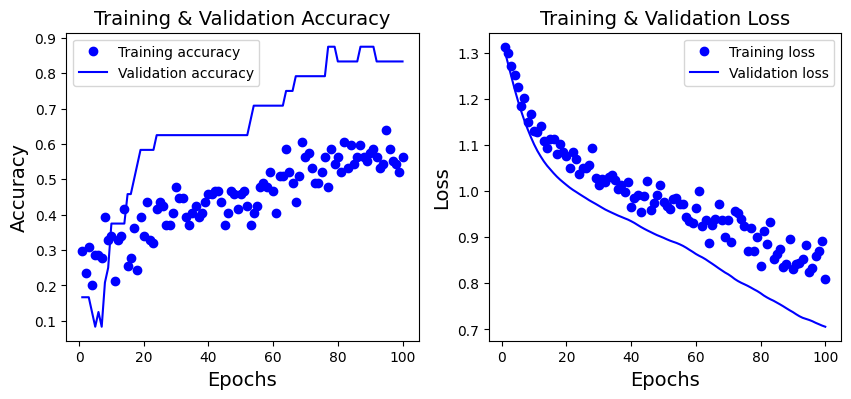

In [13]:
history_dict = model2_fitted.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Plot the model accuracy vs Epochs
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=14)
ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Accuracy', fontsize=14)
ax[0].legend()

# Plot the loss vs Epochs
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=14)
ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Loss', fontsize=14)
ax[1].legend()

## Apartado 10

**Comparar ambos modelos usando los datos de test mediante las métricas de evaluación.**

Utilizo el mismo código que para el modelo 1

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


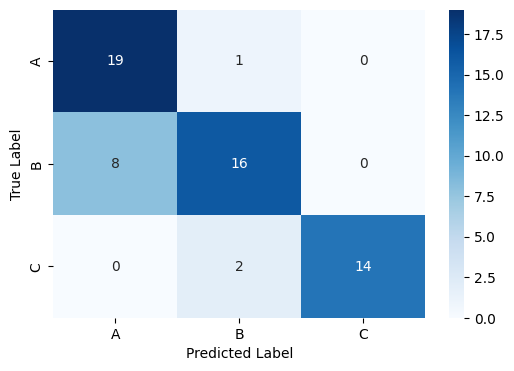

In [14]:
# Evaluar el modelo en el conjunto de prueba
y_pred_probs = model_2.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Tabla de clasificación errónea
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [16]:
# Calcular métricas de evaluación
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(class_report)

              precision    recall  f1-score   support

           A       0.70      0.95      0.81        20
           B       0.84      0.67      0.74        24
           C       1.00      0.88      0.93        16

    accuracy                           0.82        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.84      0.82      0.82        60



Con los resultados obtendidos en este apartado se observa que:

*  En la matriz de confusión se observa que:
  - La clase A, se predijo correctamente 19 de 27 veces. Se predijo 8 veces como A cuando era B.
  - La clase B se predijo correctamente 16 veces de 19. Se predijo 1 vez como B cuando en realidad era A y 2 como B cuando era C.
  - La clase C se predijo correctamente 14 veces de 14.

*  De las metricas derivadas de la matriz se observa que:
  - Para la clase A. La `precision` es del 70%. El `recall` para A es del 95%, es decir, tiene una tasa baja de falsos negativos. El `F1-score`, que se refiere al balance entre `precision` y `recall` es de 0.81. Mientras que `support` indica el número de A que había en el conjunto de prueba.
  - Para la clase B. La `precision` es del 84%, es decir tiene una tasa de falsos positivos para esta clase. El `recall` indica que el modelo identificó correctamente el 67% de las muestras reales de la clase B. El `F1-score` es de 0.74 por lo que hay balance bueno entre las dos métricas anteriores.
  - Para la clase C. La `precision` es del 100%. Con un `recall` del 88% también, por lo que tiene una tasa buena tanto de falsos positivos como de falsos negativos. Esto hace que el `F1-score` sea de 0.93.

*  El `accuracy` o exactitud es de 0.82, es decir, que el modelo predice correctamente un 82%.


Si se compara el rendimiento general de ambos modelos, el modelo 1 presenta un valor de accuracy mayor que el modelo 2, un 0.90 frente a un 0.82. Además tanto la media de precisión, el recall como el F1-score tienen mejores resultados en el modelo 1. Por lo tanto el primer modelo tendría un mejor desempeño a la hora de clasificar correctamente las clases.

Como se explica en varios apartados del libro Deep Learning (*LeCun, Y., Bengio, Y., & Hinton, G. (2015). Deep learning. Nature (London), 521(7553), 436–444) , existe un problema de sobreentrenamiento (overfitting) en redes
neuronales (y en otros modelos de aprendizaje automático) que es producido por el sobreajuste de la red a los datos. Este sobreajuste hace que la red no sea capaz de generalizar de forma correcta. Por lo tanto, aunque el modelo 2 tenga más nodos y capas, no mejora el rendimiento, lo que podría deberse a este sobreajuste que mencionaba.